In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Credit Approval Data Set from Collection: UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')


In [3]:
data.shape

(690, 16)

In [4]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [5]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [6]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
data.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [8]:
data['A5'][687] # Way to an access to element of table

'p'

In [9]:
data.at[687, 'A5'] # Another way to do the same

'p'

In [10]:
data.describe() # by default: stats for quantitative features

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [11]:
# extract categorical and numerical features
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Categorical columns: ', categorical_columns)
print('Numerical columns: ', numerical_columns)

Categorical columns:  ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
Numerical columns:  ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [12]:
data[categorical_columns].describe() # Stats for categorial features

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [13]:
data.describe(include=[object]) # Another way to do the same

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [14]:
# full list of categorical columns, where 'nan' is missing values
for c in categorical_columns:
    print(c, data[c].unique())

A1 ['b' 'a' nan]
A4 ['u' 'y' nan 'l']
A5 ['g' 'p' nan 'gg']
A6 ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
A7 ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
A9 ['t' 'f']
A10 ['t' 'f']
A12 ['f' 't']
A13 ['g' 's' 'p']
class ['+' '-']


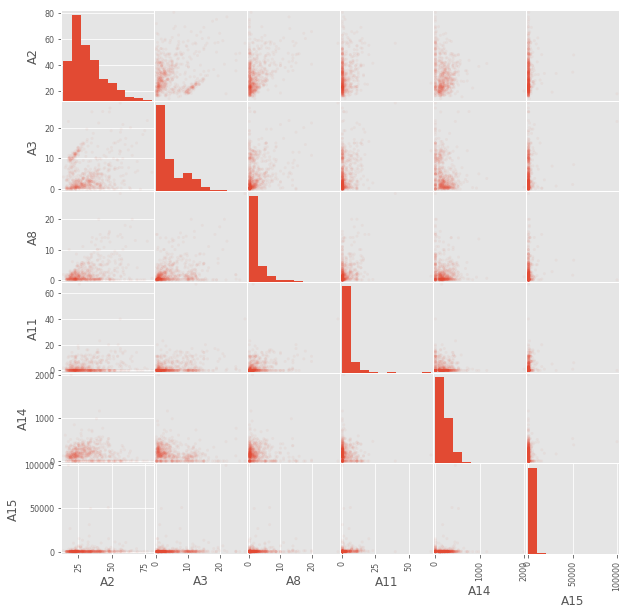

In [15]:
# for each numerical/quantitative feature built histogram,
# for each pair of them built dispersion (scattering) diagram
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [16]:
data.corr() # matrix of correlations

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


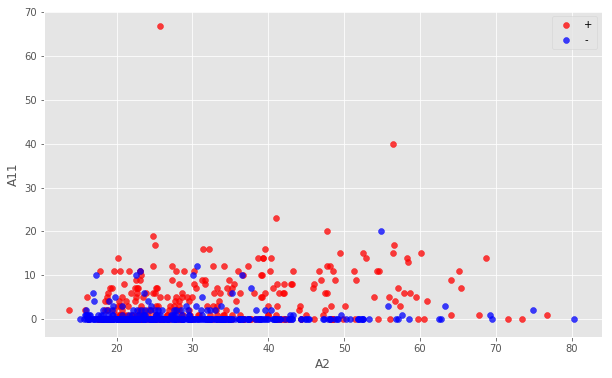

In [17]:
# Scattering diagram for A2 & A11
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

# in diagram we see good "visual" correlation between A11 and class (the points are scattered 1/5 part of the scale),
# and bad "visual" correlation between A2 and class (the points are scattered throughout the scale)

In [18]:
# Find the number of completed (not skipped) items
# axis = 0 means that we move counter from top to bottom, and axis = 1 than we move counter from left to right
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

In [19]:
data1 = data.dropna(axis=1) # Delete columns with missing values
data2 = data.dropna(axis=0) # Delete rows with missing values

In [20]:
data1.count(axis=0)

A3       690
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A15      690
class    690
dtype: int64

In [21]:
data2.count(axis=0)

A1       653
A2       653
A3       653
A4       653
A5       653
A6       653
A7       653
A8       653
A9       653
A10      653
A11      653
A12      653
A13      653
A14      653
A15      653
class    653
dtype: int64

In [22]:
# fill the missing values
# fill all numerical features (Instead of gaps (missing values), we substitute the median values)
data = data.fillna(data.median(axis=0), axis=0)

In [23]:
# before
data['A1'].describe()

count     678
unique      2
top         b
freq      468
Name: A1, dtype: object

In [24]:
# fill the missing values in categorical feature with top value (Instead missing values) we substitute the top value in this column
data['A1'] = data['A1'].fillna('b')

In [25]:
# result
data['A1'].describe()

count     690
unique      2
top         b
freq      480
Name: A1, dtype: object

In [26]:
data_describe = data.describe(include=[object])
data_describe

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,519,519,137,399,361,395,374,625,383


In [27]:
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [28]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [29]:
# Vectorizing

In [30]:
# devide categorical (non-numerical) columns to binary and nonbinary
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)


['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [31]:
# for binary columns values change to 0 and 1
# print([[c, data[c].unique()] for c in binary_columns])
for c in binary_columns[0:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [32]:
print([[c, data[c].unique()] for c in binary_columns])

[['A1', array([0, 1], dtype=object)], ['A9', array([0, 1], dtype=object)], ['A10', array([1, 0], dtype=object)], ['A12', array([0, 1], dtype=object)], ['class', array([1, 0], dtype=object)]]


In [33]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383


In [34]:
# for non-binary columns|features vectorizing is 1) divide each column to the numbers of unique values in the column
# 2) and if value exist then only one column's row filled like 1
# for example, column A4 have 3 unique values: print(data['A4'].unique()) => ['u' 'y' 'l']
# create 3 new columns: 4_u, A4_y, A4_l
# If A4 value is 'u', then A4_u = 1, A4_y = 0, A4_l = 0, etc.
# In Pandas it's performed via using .get_dummies method.

data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [35]:
data_nonbinary.describe()




,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,A6_cc,A6_d,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,...,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.002899,0.760870,0.236232,0.760870,0.002899,0.236232,0.078261,0.211594,0.059420,0.043478,...,0.082609,0.20000,0.011594,0.005797,0.002899,0.591304,0.011594,0.905797,0.011594,0.082609
std,0.053799,0.426862,0.425074,0.426862,0.053799,0.425074,0.268776,0.408735,0.236581,0.204079,...,0.275490,0.40029,0.107128,0.075973,0.053799,0.491949,0.107128,0.292323,0.107128,0.275490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
